In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import warnings
warnings.filterwarnings('ignore')
import nltk
nltk.download(
    
)

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [

True

In [5]:
# Load file 2018
da18 = pd.read_excel('2018.xlsx')
da18.head(2)

Respondent ID  Collector ID  ... Column16296 Column16297
0   1.042855e+10   221796404.0  ...         NaN         NaN
1   1.042289e+10   221796404.0  ...         NaN         NaN

[2 rows x 16384 columns]

In [6]:
# Rename conductor feedback
da18.rename(columns = {'43.How can we communicate with you better? What would you like to hear more or less of?':'communication'},inplace = True)

In [8]:
da18_clean = da18['communication'].dropna()

In [9]:
da18_clean = da18_clean.reset_index()
da18_clean = da18_clean.drop(columns=['index'])

In [10]:
# 4.Topic modelling
from nltk.stem import PorterStemmer
import re

In [11]:
#Data Cleaning by removing punctuations, numbers, special characters, and short words
documents = da18_clean['communication']
Cleaned_doc = []
for r in range(len(documents)):
    tweet = documents[r]
    try:
        tweet = re.sub('[^A-Za-z]', ' ', tweet) #removing everything except alphabets
        tweet = tweet.lower() #lowercase
        Tokens = tweet.split() #tokenization
        Filtered_token = [w for w in Tokens if len(w)>3] # removing short words
        tweet = ' '.join(Filtered_token) 
    except:
        continue
#Save cleaned text
    Cleaned_doc.append(tweet) 
    print('-[Tweet Text]: ', tweet)

-[Tweet Text]:  email probably best method quickly scan through your mail concentrate more heavily pieces information that relevant
-[Tweet Text]:  email
-[Tweet Text]:  opinion
-[Tweet Text]:  think announcements choir sufficient sometimes email good receive participate othersocial media email reminder attend special event good receive
-[Tweet Text]:  less about money more following through when will something like sending shirts clearer forms better forms people join choir communicate with melbourne
-[Tweet Text]:  content with level communication
-[Tweet Text]:  just right
-[Tweet Text]:  received right amount communication email
-[Tweet Text]:  member have enough communication moment
-[Tweet Text]:  email
-[Tweet Text]:  participating level that good
-[Tweet Text]:  shorter comms would great some them very long detailed
-[Tweet Text]:  less emails
-[Tweet Text]:  happy with current communications
-[Tweet Text]:  more timely information about functions logistics less phone calls abo

In [13]:
  >>> import nltk
  >>> nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
#Remove the stop-words from the text data
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words = ['https','because','please','very','thank','call','watch','look','today','something','someone',
 'anyone','anything','everyone','everything','thanks','care','thing','doesn','things']
# Remove Stop Words
for r in range(len(Cleaned_doc)):
    each_item = []
    for t in Cleaned_doc[r].split():
        if t not in stop_words:
            each_item.append(t)
    Cleaned_doc[r] = ' '.join(each_item) 
    print('-[Cleaned Text]: ', Cleaned_doc[r])

-[Cleaned Text]:  email probably best method quickly scan through your mail concentrate more heavily pieces information that relevant
-[Cleaned Text]:  email
-[Cleaned Text]:  opinion
-[Cleaned Text]:  think announcements choir sufficient sometimes email good receive participate othersocial media email reminder attend special event good receive
-[Cleaned Text]:  less about money more following through when will like sending shirts clearer forms better forms people join choir communicate with melbourne
-[Cleaned Text]:  content with level communication
-[Cleaned Text]:  just right
-[Cleaned Text]:  received right amount communication email
-[Cleaned Text]:  member have enough communication moment
-[Cleaned Text]:  email
-[Cleaned Text]:  participating level that good
-[Cleaned Text]:  shorter comms would great some them long detailed
-[Cleaned Text]:  less emails
-[Cleaned Text]:  happy with current communications
-[Cleaned Text]:  more timely information about functions logistics less 

In [15]:
  >>> import nltk
  >>> nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
  >>> import nltk
  >>> nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [17]:
#Select only nouns
Cleaned_doc_noun = Cleaned_doc
for r in range(len(Cleaned_doc_noun)):
    lines = Cleaned_doc[r]
# function to test if something is a noun
    is_noun = lambda pos: pos[:2] == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS'
 # do the nlp stuff
    tokenized = nltk.word_tokenize(lines)
    nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
    Cleaned_doc_noun[r] = ' '.join(nouns) 
    print('-[Cleaned Text Noun]: ', Cleaned_doc_noun[r])

-[Cleaned Text Noun]:  email mail concentrate information relevant
-[Cleaned Text Noun]:  email
-[Cleaned Text Noun]:  opinion
-[Cleaned Text Noun]:  think announcements receive media reminder event receive
-[Cleaned Text Noun]:  money shirts clearer forms forms people communicate melbourne
-[Cleaned Text Noun]:  content communication
-[Cleaned Text Noun]:  
-[Cleaned Text Noun]:  amount communication email
-[Cleaned Text Noun]:  member communication moment
-[Cleaned Text Noun]:  email
-[Cleaned Text Noun]:  level
-[Cleaned Text Noun]:  shorter comms
-[Cleaned Text Noun]:  emails
-[Cleaned Text Noun]:  communications
-[Cleaned Text Noun]:  information functions logistics phone
-[Cleaned Text Noun]:  programs
-[Cleaned Text Noun]:  letter
-[Cleaned Text Noun]:  
-[Cleaned Text Noun]:  messages venue changes access computer time access phones
-[Cleaned Text Noun]:  specialist choir performances choirs area
-[Cleaned Text Noun]:  communication email facebook twitter linkedin
-[Cleaned Tex

In [ ]:
# 4.2 Term document matrix

In [18]:
#Fit and transform the processed titles
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer() 
count_data = count_vectorizer.fit_transform(Cleaned_doc_noun)
count_data

<83x129 sparse matrix of type '<class 'numpy.int64'>'
	with 211 stored elements in Compressed Sparse Row format>

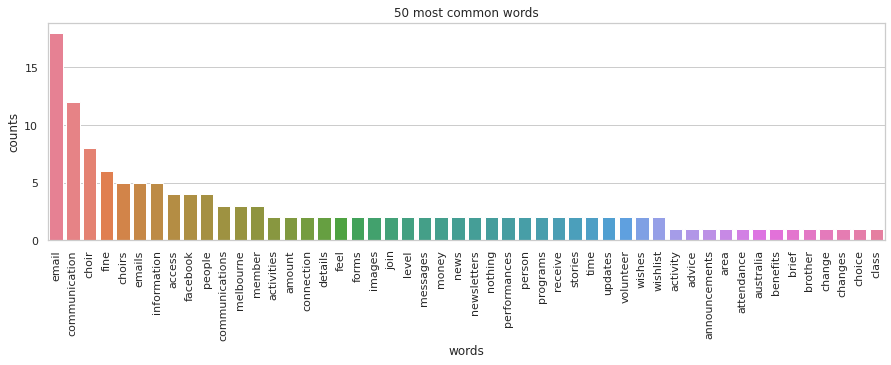

In [19]:
#Visualise most common words
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_colwidth", 200)

terms = count_vectorizer.get_feature_names()
# Count the popularity of words
total_counts = np.zeros(len(terms))
for t in count_data:
    total_counts+=t.toarray()[0]
count_dict = (zip(terms, total_counts))
count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:50] #Take the top 50 words
 
words = [w[0] for w in count_dict]
counts = [w[1] for w in count_dict]
x_pos = np.arange(len(words))
 
plt.figure(2, figsize=(15, 4))
plt.subplot(title='50 most common words')
sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
sns.barplot(x_pos, counts, palette='husl')
plt.xticks(x_pos, words, rotation=90) 
plt.xlabel('words')
plt.ylabel('counts')
plt.show()

In [ ]:
# 4.3/ Term selection

In [20]:
#Remove highly frequent as from above graph and infrequent words from the Dataset
keepIndex = [];
for t in range(len(total_counts)):
    if total_counts[t] < 30 and total_counts[t] > 1:
        keepIndex.append(t)

print('Number of Terms Remained: ', len(keepIndex))

#Save the remain ing term and frequency data
ReducedTerm = [terms[t] for t in keepIndex]
ReducedCount = count_data[:,keepIndex] 
ReducedCount

Number of Terms Remained:  37


<83x37 sparse matrix of type '<class 'numpy.int64'>'
	with 119 stored elements in Compressed Sparse Row format>

In [ ]:
#4.4. Topic number

In [21]:
#Install Gensim package
!pip install Cython
!pip install gensim

In [22]:
#Data Preparation
Cleaned_doc_noun_new = []
print('CLEANED TEXT NEW: ')
for r in range(len(Cleaned_doc_noun)):
    each_item = []
    for t in Cleaned_doc_noun[r].split():
 #Keep only terms included in ReducedTerm
        if t in ReducedTerm:
            each_item.append(t)
    Cleaned_doc_noun_new.append(each_item) 
    print(Cleaned_doc_noun_new[r])

CLEANED TEXT NEW: 
['email', 'information']
['email']
[]
['receive', 'receive']
['money', 'forms', 'forms', 'people', 'melbourne']
['communication']
[]
['amount', 'communication', 'email']
['member', 'communication']
['email']
['level']
[]
['emails']
['communications']
['information']
['programs']
[]
[]
['messages', 'access', 'time', 'access']
['choir', 'performances', 'choirs']
['communication', 'email', 'facebook']
['messages', 'images', 'choir', 'images', 'choir', 'connection', 'connection', 'member', 'choir', 'people']
['nothing', 'amount', 'communication']
['communication', 'email', 'fine']
['wishlist', 'choir', 'wishlist', 'wishes', 'choir', 'person', 'people', 'communications']
['email']
['information']
['volunteer', 'access']
['email']
['choirs', 'news']
['communication', 'level', 'updates', 'time', 'newsletters']
['fine']
['email']
['wishes']
[]
['email', 'fine']
['email']
['email']
['emails', 'stories', 'choirs', 'join']
['email']
['communication', 'fine']
['communications']


In [23]:
import gensim.corpora as corpora
# Construct term dictionary in the format "Term : Index"
id2word = corpora.Dictionary(Cleaned_doc_noun_new)
print(id2word.token2id)

{'email': 0, 'information': 1, 'receive': 2, 'forms': 3, 'melbourne': 4, 'money': 5, 'people': 6, 'communication': 7, 'amount': 8, 'member': 9, 'level': 10, 'emails': 11, 'communications': 12, 'programs': 13, 'access': 14, 'messages': 15, 'time': 16, 'choir': 17, 'choirs': 18, 'performances': 19, 'facebook': 20, 'connection': 21, 'images': 22, 'nothing': 23, 'fine': 24, 'person': 25, 'wishes': 26, 'wishlist': 27, 'volunteer': 28, 'news': 29, 'newsletters': 30, 'updates': 31, 'join': 32, 'stories': 33, 'activities': 34, 'details': 35, 'feel': 36}


In [24]:
#Bag of Word Representation
Corpus = [id2word.doc2bow(text) for text in Cleaned_doc_noun_new]
print(Corpus)

[[(0, 1), (1, 1)], [(0, 1)], [], [(2, 2)], [(3, 2), (4, 1), (5, 1), (6, 1)], [(7, 1)], [], [(0, 1), (7, 1), (8, 1)], [(7, 1), (9, 1)], [(0, 1)], [(10, 1)], [], [(11, 1)], [(12, 1)], [(1, 1)], [(13, 1)], [], [], [(14, 2), (15, 1), (16, 1)], [(17, 1), (18, 1), (19, 1)], [(0, 1), (7, 1), (20, 1)], [(6, 1), (9, 1), (15, 1), (17, 3), (21, 2), (22, 2)], [(7, 1), (8, 1), (23, 1)], [(0, 1), (7, 1), (24, 1)], [(6, 1), (12, 1), (17, 2), (25, 1), (26, 1), (27, 2)], [(0, 1)], [(1, 1)], [(14, 1), (28, 1)], [(0, 1)], [(18, 1), (29, 1)], [(7, 1), (10, 1), (16, 1), (30, 1), (31, 1)], [(24, 1)], [(0, 1)], [(26, 1)], [], [(0, 1), (24, 1)], [(0, 1)], [(0, 1)], [(11, 1), (18, 1), (32, 1), (33, 1)], [(0, 1)], [(7, 1), (24, 1)], [(12, 1)], [(20, 1)], [(1, 1)], [(0, 1), (20, 1)], [(19, 1)], [(0, 1), (24, 1)], [(0, 1)], [], [(20, 1)], [(29, 1), (33, 1)], [(0, 1)], [], [(11, 1)], [(14, 1), (18, 1), (34, 1), (35, 1)], [(7, 1)], [(0, 1), (7, 1), (25, 1), (36, 1)], [], [], [(7, 1), (24, 1)], [(11, 1)], [], [(23, 

In [25]:
#Gensim LDA Model
import gensim
from gensim.models.ldamodel import LdaModel
from pprint import pprint
#Train model using bag of word reprentation
lda_model = gensim.models.ldamodel.LdaModel(corpus=Corpus,
 id2word=id2word,
num_topics=15,
random_state=100)
#Print the Keyword in the 10 topics
pprint(lda_model.print_topics(num_words=10))
doc_lda = lda_model[Corpus]

[(0,
  '0.180*"communications" + 0.093*"communication" + 0.093*"amount" + '
  '0.093*"feel" + 0.093*"nothing" + 0.093*"money" + 0.093*"member" + '
  '0.093*"information" + 0.006*"email" + 0.006*"fine"'),
 (1,
  '0.195*"programs" + 0.195*"volunteer" + 0.195*"newsletters" + 0.012*"email" '
  '+ 0.012*"communication" + 0.012*"emails" + 0.012*"information" + '
  '0.012*"fine" + 0.012*"facebook" + 0.012*"communications"'),
 (2,
  '0.143*"choirs" + 0.143*"activities" + 0.143*"access" + 0.143*"details" + '
  '0.143*"level" + 0.009*"email" + 0.009*"communication" + 0.009*"information" '
  '+ 0.009*"emails" + 0.009*"fine"'),
 (3,
  '0.143*"stories" + 0.143*"news" + 0.143*"access" + 0.143*"volunteer" + '
  '0.143*"communication" + 0.009*"email" + 0.009*"information" + '
  '0.009*"emails" + 0.009*"fine" + 0.009*"communications"'),
 (4,
  '0.474*"facebook" + 0.165*"email" + 0.010*"communication" + '
  '0.010*"information" + 0.010*"emails" + 0.010*"fine" + '
  '0.010*"communications" + 0.010*"progr

In [26]:
#Compute topic coherence sore
from gensim.models import CoherenceModel
# Compute Coherence Score. Note: that CoherenceModel require 
# text input format (Cleaned_doc_new) instead of bag of word 
coherence_model_lda = CoherenceModel(model=lda_model, 
 texts=Cleaned_doc_noun_new, 
dictionary=id2word, 
coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.7062519174250778


In [27]:
#Experiment with Topic Numbers
#Evaluation models with topics numbers from 2 to 10
Topics = list(range(2,16,1))
coherence_scores = []
Trained_Models = []
for top in Topics:
 lda_model = gensim.models.ldamodel.LdaModel(corpus=Corpus,
 id2word=id2word,
num_topics=top,
random_state=100)
 #Keep the trained models
 Trained_Models.append(lda_model)
 #Compute coherence score for each model
 coherence_model_lda = CoherenceModel(model=lda_model, 
 texts=Cleaned_doc_noun_new, 
dictionary=id2word, 
coherence='c_v')
 coherence = coherence_model_lda.get_coherence()
 #Save and print the coherence scores 
 coherence_scores.append(coherence)
 print('Topic Number: {0} -- Coherence: {1}'.format(top, coherence))

Topic Number: 2 -- Coherence: 0.653601523218888
Topic Number: 3 -- Coherence: 0.6250815029208603
Topic Number: 4 -- Coherence: 0.6342296236926288
Topic Number: 5 -- Coherence: 0.6550235215841564
Topic Number: 6 -- Coherence: 0.6763211140014529
Topic Number: 7 -- Coherence: 0.6871832913049288
Topic Number: 8 -- Coherence: 0.6880421646058749
Topic Number: 9 -- Coherence: 0.6921746198691197
Topic Number: 10 -- Coherence: 0.6921064470573983
Topic Number: 11 -- Coherence: 0.6982525550252618
Topic Number: 12 -- Coherence: 0.7043539433941772
Topic Number: 13 -- Coherence: 0.7090817342712654
Topic Number: 14 -- Coherence: 0.7107174469687874
Topic Number: 15 -- Coherence: 0.7062519174250778


Text(0, 0.5, 'Coherence')

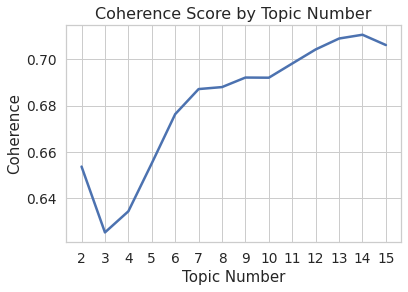

In [28]:
plt.plot(coherence_scores)
plt.xticks(range(0,len(Topics)),Topics)
plt.title('Coherence Score by Topic Number', fontsize=16)
plt.xlabel('Topic Number')
plt.ylabel('Coherence')

In [29]:
import numpy
lda_model = Trained_Models[numpy.argmax(coherence_scores)]
#Show top 10 words in each topic
lda_model.show_topics(num_words=10)

[(5,
  '0.141*"forms" + 0.141*"fine" + 0.141*"communication" + 0.073*"people" + 0.073*"money" + 0.073*"melbourne" + 0.073*"choir" + 0.073*"activities" + 0.073*"facebook" + 0.005*"email"'),
 (4,
  '0.215*"email" + 0.215*"facebook" + 0.111*"member" + 0.111*"money" + 0.111*"feel" + 0.007*"communication" + 0.007*"information" + 0.007*"emails" + 0.007*"fine" + 0.007*"communications"'),
 (3,
  '0.243*"access" + 0.164*"receive" + 0.085*"messages" + 0.085*"time" + 0.085*"news" + 0.085*"stories" + 0.085*"volunteer" + 0.006*"email" + 0.006*"communication" + 0.006*"information"'),
 (8,
  '0.427*"email" + 0.100*"choir" + 0.100*"fine" + 0.068*"images" + 0.068*"connection" + 0.035*"communication" + 0.035*"people" + 0.035*"member" + 0.035*"messages" + 0.035*"information"'),
 (6,
  '0.161*"choirs" + 0.161*"choir" + 0.161*"performances" + 0.161*"melbourne" + 0.011*"email" + 0.011*"communication" + 0.011*"information" + 0.011*"emails" + 0.011*"fine" + 0.011*"facebook"'),
 (1,
  '0.111*"email" + 0.111*"c

In [30]:
#4.5/ LDA Model
#Train LDA Model with 14 topics
from sklearn.decomposition import LatentDirichletAllocation as LDA
# Tweak the two parameters below
number_topics = 14
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(ReducedCount)
#Trained LDA model
lda.components_

array([[ 0.07142857,  0.07142857,  2.07142853,  0.07142857,  0.07142857,
         2.07142904,  0.07142857,  0.07142857,  0.07142857,  0.07142885,
         0.07142857,  0.07142857,  0.07142857,  0.07142857,  0.07142857,
         0.07142857,  0.07142857,  0.07142857,  0.07142857,  0.07142857,
         0.07142857,  0.07142857,  0.07142857,  0.07142857,  0.07142857,
         1.07142871,  0.07142857,  0.07142857,  0.07142857,  0.07142857,
         0.07142857,  0.07142857,  0.07142857,  0.07142857,  0.07142857,
         0.07142857,  0.07142857],
       [ 1.071428  ,  1.07142842,  0.07142857,  1.07142689,  3.07142857,
         0.07142857,  0.07142857,  0.07142857,  1.07142855,  0.07142857,
         0.07142857,  0.07142857,  1.07142813,  0.07142857,  0.07142857,
         0.07142857,  0.07142857,  0.07142857,  0.07142857,  0.07142857,
         1.07142841,  0.07142857,  1.0714282 ,  1.07142837,  0.07142857,
         0.07142857,  0.07142857,  2.07142857,  0.07142857,  0.07142857,
         0.07142

In [31]:
#Word Probablities by Topics
Word_Topics_Pro = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]
print(Word_Topics_Pro)

[[0.00934579 0.00934579 0.271028   0.00934579 0.00934579 0.27102807
  0.00934579 0.00934579 0.00934579 0.00934583 0.00934579 0.00934579
  0.00934579 0.00934579 0.00934579 0.00934579 0.00934579 0.00934579
  0.00934579 0.00934579 0.00934579 0.00934579 0.00934579 0.00934579
  0.00934579 0.14018692 0.00934579 0.00934579 0.00934579 0.00934579
  0.00934579 0.00934579 0.00934579 0.00934579 0.00934579 0.00934579
  0.00934579]
 [0.06849313 0.06849316 0.00456621 0.06849306 0.19634708 0.00456621
  0.00456621 0.00456621 0.06849317 0.00456621 0.00456621 0.00456621
  0.06849314 0.00456621 0.00456621 0.00456621 0.00456621 0.00456621
  0.00456621 0.00456621 0.06849316 0.00456621 0.06849314 0.06849315
  0.00456621 0.00456621 0.00456621 0.13242012 0.00456621 0.00456621
  0.00456621 0.00456621 0.00456621 0.00456621 0.00456621 0.00456621
  0.00456621]
 [0.00740741 0.00740741 0.00740741 0.00740741 0.00740741 0.11111103
  0.00740741 0.00740741 0.00740741 0.00740741 0.00740741 0.00740741
  0.00740741 0.00740

In [32]:
#Extract and view the top words in each topic
for topic_idx, topic in enumerate(Word_Topics_Pro):
    print("\nTopic #%d:" % topic_idx)
    count_dict = (zip(ReducedTerm, topic))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:5]
    for w in count_dict:
        print(w[0], ': {0:.3f}'.format(w[1]))


Topic #0:
communication : 0.271
amount : 0.271
nothing : 0.140
email : 0.009
facebook : 0.009

Topic #1:
choirs : 0.196
performances : 0.132
details : 0.068
activities : 0.068
member : 0.068

Topic #2:
level : 0.215
newsletters : 0.215
updates : 0.111
time : 0.111
communication : 0.111

Topic #3:
forms : 0.271
melbourne : 0.140
money : 0.140
people : 0.140
email : 0.009

Topic #4:
choir : 0.260
connection : 0.132
images : 0.132
people : 0.132
member : 0.132

Topic #5:
facebook : 0.207
communications : 0.156
choir : 0.105
wishlist : 0.105
receive : 0.105

Topic #6:
email : 0.161
feel : 0.161
person : 0.161
communication : 0.161
facebook : 0.011

Topic #7:
access : 0.178
programs : 0.178
news : 0.092
messages : 0.092
stories : 0.092

Topic #8:
volunteer : 0.140
activities : 0.140
access : 0.140
choir : 0.140
melbourne : 0.140

Topic #9:
join : 0.231
nothing : 0.231
email : 0.015
facebook : 0.015
fine : 0.015

Topic #10:
email : 0.666
fine : 0.237
facebook : 0.003
communication : 0.003
i

In [33]:
# View full Word Probabilities by Topic Matrix
df_topic_keywords = pd.DataFrame(Word_Topics_Pro)
df_topic_keywords.columns = ReducedTerm
df_topic_keywords

access  activities    amount  ...  volunteer    wishes  wishlist
0   0.009346    0.009346  0.271028  ...   0.009346  0.009346  0.009346
1   0.068493    0.068493  0.004566  ...   0.004566  0.004566  0.004566
2   0.007407    0.007407  0.007407  ...   0.007407  0.007407  0.007407
3   0.009346    0.009346  0.009346  ...   0.009346  0.009346  0.009346
4   0.004566    0.004566  0.004566  ...   0.004566  0.004566  0.004566
5   0.003636    0.003636  0.003636  ...   0.003636  0.105455  0.105455
6   0.010753    0.010753  0.010753  ...   0.010753  0.010753  0.010753
7   0.177914    0.006135  0.006135  ...   0.092025  0.006135  0.006135
8   0.140187    0.140187  0.009346  ...   0.140187  0.009346  0.009346
9   0.015385    0.015385  0.015385  ...   0.015385  0.015385  0.015385
10  0.002786    0.002786  0.002786  ...   0.002786  0.002786  0.002786
11  0.006711    0.006711  0.006711  ...   0.006711  0.006711  0.006711
12  0.004878    0.004878  0.004878  ...   0.004878  0.004878  0.004878
13  0.009346    0.009346  0.009346  ...   0.009346  0.009346  0.009346

[14 rows x 37 columns]

In [34]:
!pip install wordcloud

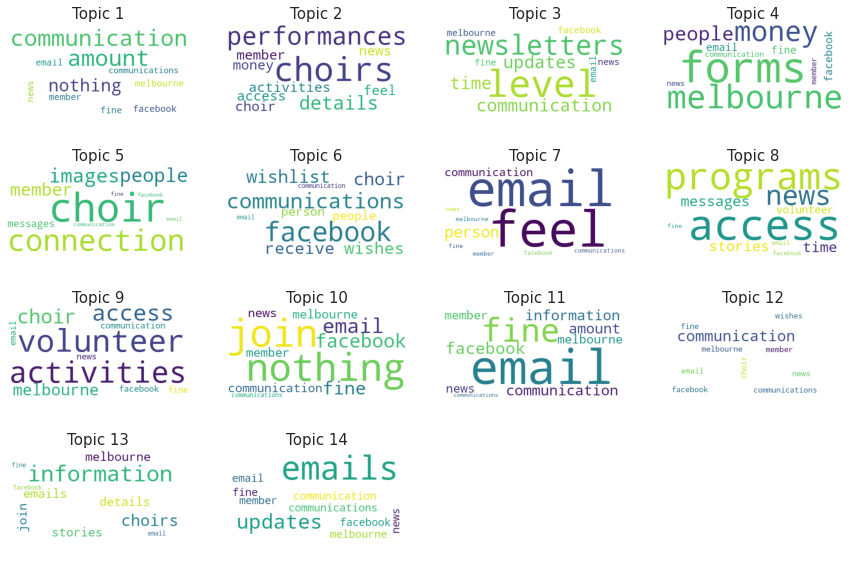

In [35]:
from wordcloud import WordCloud
import math
rows = math.ceil(len(Word_Topics_Pro)/4)
fig, ax = plt.subplots(rows, 4, figsize=(15,2.5*rows))
[axi.set_axis_off() for axi in ax.ravel()]
for topic_idx, topic in enumerate(Word_Topics_Pro):
 count_dict = (zip(ReducedTerm, topic))
 count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)
 # convert to dictionary type - keep top 10 words
 Word_Frequency = dict(count_dict[0:10])
 # generate word cloud
 wordcloud = WordCloud(background_color="white").generate_from_frequencies(Word_Frequency)
 # visualize word cloud in figure
 subfig_Row = math.floor(topic_idx/4)
 subfig_Col = math.ceil(topic_idx%4)
 ax[subfig_Row,subfig_Col].imshow(wordcloud)
 ax[subfig_Row,subfig_Col].set_title("Topic {}".format(topic_idx+1)) 
plt.show() 